# 2.11 CE-QUAL-W2 Workshop
## 2.11b. Visualization and Analysis

In this workshop, we will be working with a CE-QUAL-W2 meteorology input file. We will:
1. Import the w2.py module, which contains several functions that simplify working with CE-QUAL-W2 data
2. Display the data in a data table
3. Adjust the met data to produce data for an alternative scenario, where air temperature has warmed by two degrees, wind speed has doubled, and a constant 50% cloud cover will be used for the entire simulation period.
4. Write the revised data to a new Comma-Delimited Value (CSV) meteorology file, with a special header that CE-QUAL-W2 requires.
5. Write the revised data to HDF5 (Heirarchical Data Format, Version 5) format.
6. Read the data back in from the HDF5 file and display the data table.

In [1]:
import w2

#### Input Filename

Name of the file to plot:

In [2]:
infile = 'met.npt'

#### Simulation Year

If the files were created with Excel, use 1900 for the year.

In [3]:
year = 1980

#### Column Names and Labels

Specify the names you want to use to label the data columns:

In [4]:
data_columns = [
    'Air Temperature',
    'Dew Point Temperature',
    'Wind Speed',
    'Wind Direction',
    'Cloudiness',
]

Specify the labels to use for the y-axis labels on the plots:

In [5]:
ylabels = [
    'Air Temperature ($^oC$)',
    'Dew Point Temperature ($^oC$)',
    'Wind Speed (m/s)',
    'Wind Direction (radians)',
    'Cloudiness (fraction)',
]

#### Read the Meteorology Data

In [6]:
met = w2.read('met.npt', year, data_columns)

In [7]:
display(met)

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness
Date,,,,,
1980-01-01 00:00:00,2.2,-1.1,1.9,4.72,0.0
1980-01-01 03:00:00,1.7,-1.1,2.3,4.37,0.0
1980-01-01 06:00:00,0.0,-3.3,1.1,5.07,0.0
1980-01-01 09:00:00,3.3,-0.6,2.3,4.37,0.0
1980-01-01 12:00:00,11.1,1.1,2.7,5.07,0.0
...,...,...,...,...,...
1980-12-31 09:00:00,7.8,-0.6,3.0,4.20,4.0
1980-12-31 12:00:00,15.6,1.7,3.4,5.07,0.0
1980-12-31 15:00:00,17.8,1.1,2.3,4.90,0.0


#### Plot the Data

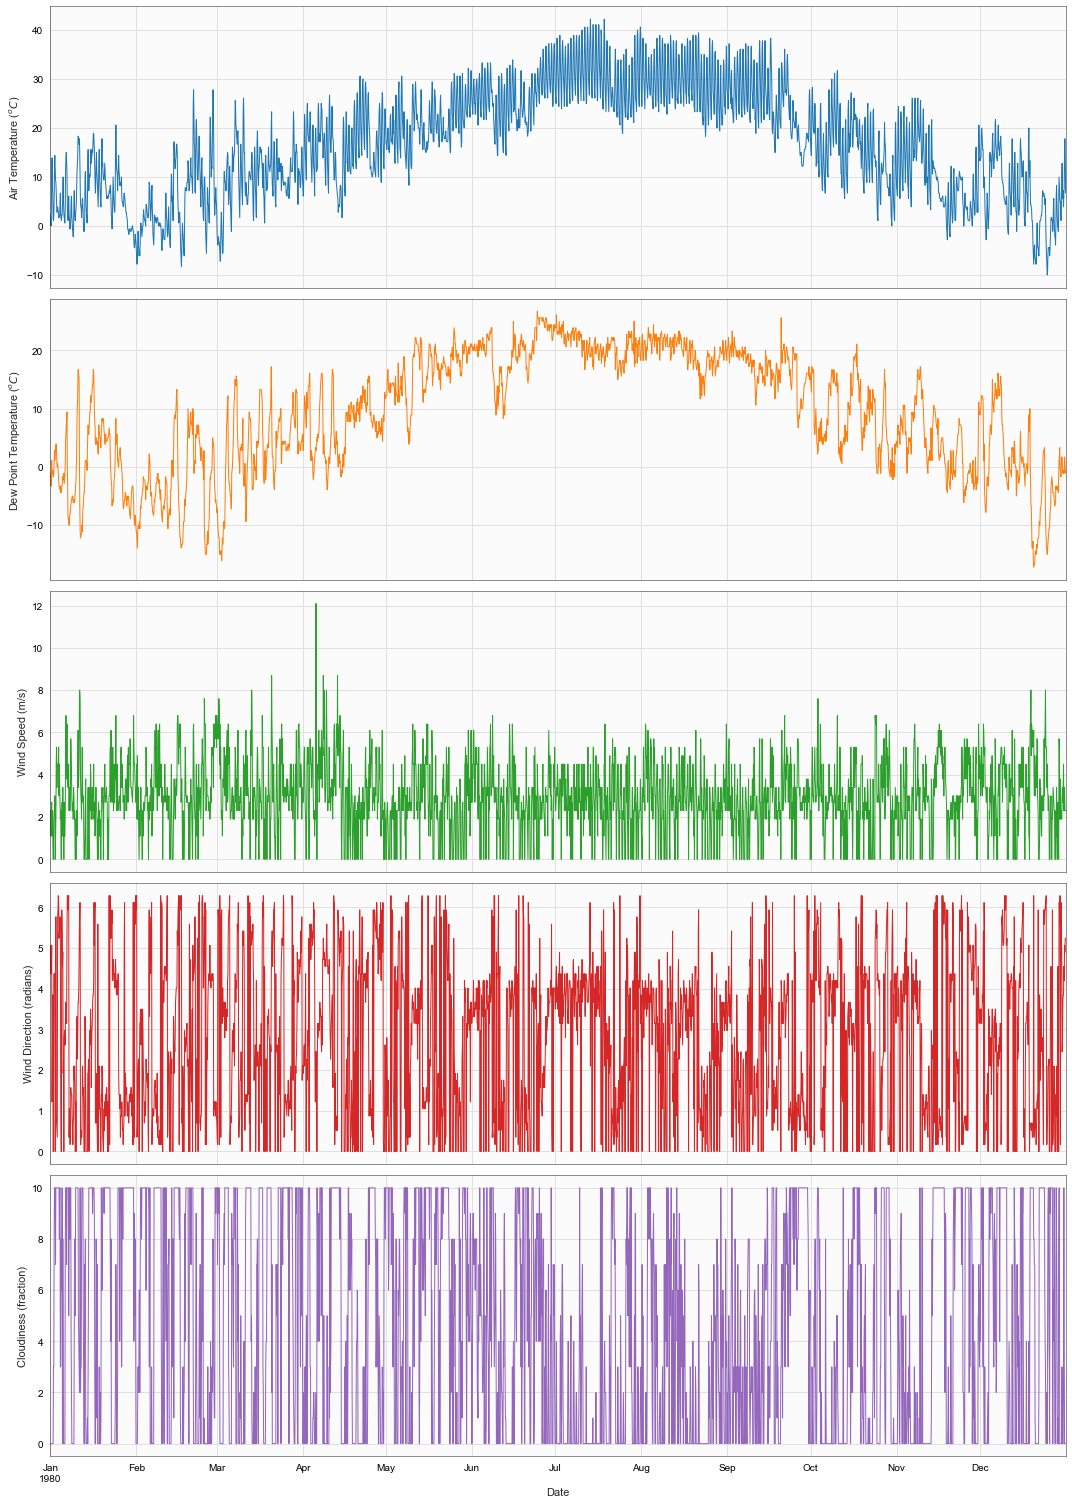

In [8]:
w2.multi_plot(met, ylabels=ylabels, palette='tab10');

#### Set the Cloudiness to 50%

The cloud data is scaled from 1 to 10, with 5 representing 50% cloud cover.

In [9]:
met['Cloudiness'] = 5
met

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness
Date,,,,,
1980-01-01 00:00:00,2.2,-1.1,1.9,4.72,5
1980-01-01 03:00:00,1.7,-1.1,2.3,4.37,5
1980-01-01 06:00:00,0.0,-3.3,1.1,5.07,5
1980-01-01 09:00:00,3.3,-0.6,2.3,4.37,5
1980-01-01 12:00:00,11.1,1.1,2.7,5.07,5
...,...,...,...,...,...
1980-12-31 09:00:00,7.8,-0.6,3.0,4.20,5
1980-12-31 12:00:00,15.6,1.7,3.4,5.07,5
1980-12-31 15:00:00,17.8,1.1,2.3,4.90,5


#### Increase the Air Temperature by 2 $^{\circ}C$

This uses an *addition assignment* operator, `+=`. This operator tells Python to take the current time series and add 2 to it, replacing the existing values.

In [10]:
met['Air Temperature'] += 2
met

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness
Date,,,,,
1980-01-01 00:00:00,4.2,-1.1,1.9,4.72,5
1980-01-01 03:00:00,3.7,-1.1,2.3,4.37,5
1980-01-01 06:00:00,2.0,-3.3,1.1,5.07,5
1980-01-01 09:00:00,5.3,-0.6,2.3,4.37,5
1980-01-01 12:00:00,13.1,1.1,2.7,5.07,5
...,...,...,...,...,...
1980-12-31 09:00:00,9.8,-0.6,3.0,4.20,5
1980-12-31 12:00:00,17.6,1.7,3.4,5.07,5
1980-12-31 15:00:00,19.8,1.1,2.3,4.90,5


#### Double the Wind Speed

This uses a *multiplication assignment* operator, `+=`. This operator tells Python to take the current time series, multiply it by 2 and then replace the existing time series with the new values.

In [11]:
met['Wind Speed'] *= 2
met

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness
Date,,,,,
1980-01-01 00:00:00,4.2,-1.1,3.8,4.72,5
1980-01-01 03:00:00,3.7,-1.1,4.6,4.37,5
1980-01-01 06:00:00,2.0,-3.3,2.2,5.07,5
1980-01-01 09:00:00,5.3,-0.6,4.6,4.37,5
1980-01-01 12:00:00,13.1,1.1,5.4,5.07,5
...,...,...,...,...,...
1980-12-31 09:00:00,9.8,-0.6,6.0,4.20,5
1980-12-31 12:00:00,17.6,1.7,6.8,5.07,5
1980-12-31 15:00:00,19.8,1.1,4.6,4.90,5


#### Save the Revised Meterology Data to CSV

In [12]:
w2.write_csv(met, 'met_test.csv', year, header='$1980 DeGray Reservoir meteorology, revised\n\n')

#### Save Meteorology to an HDF5 File

In [13]:
w2.write_hdf(met, 'inputs/Meteorology', 'DeGray.h5')

#### Read the Meteorology back in from HDF5

In [14]:
df = w2.read_hdf('inputs/Meteorology', 'DeGray.h5', data_columns)
df

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness
1980-01-01 00:00:00,4.2,-1.1,3.8,4.72,5
1980-01-01 03:00:00,3.7,-1.1,4.6,4.37,5
1980-01-01 06:00:00,2.0,-3.3,2.2,5.07,5
1980-01-01 09:00:00,5.3,-0.6,4.6,4.37,5
1980-01-01 12:00:00,13.1,1.1,5.4,5.07,5
...,...,...,...,...,...
1980-12-31 09:00:00,9.8,-0.6,6.0,4.20,5
1980-12-31 12:00:00,17.6,1.7,6.8,5.07,5
1980-12-31 15:00:00,19.8,1.1,4.6,4.90,5
1980-12-31 18:00:00,16.4,-1.1,4.6,5.24,5
